<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

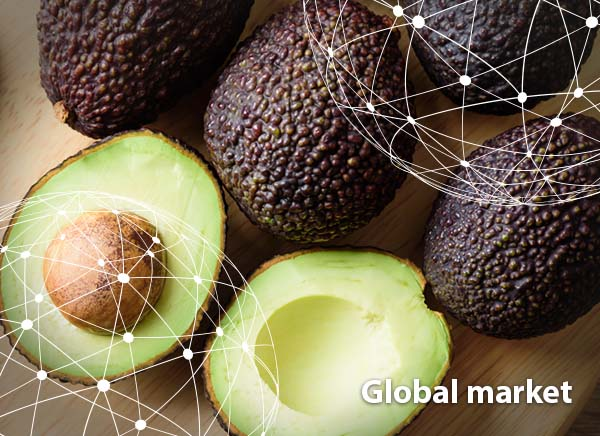

## AVOCADO PRICE PREDICTION (MACHINE LEARNING - INTERMEDIATE)

**Submitted by NARAYAN V. SHANBHAG**

**GCD Student, INSAID**

**Batch: May 9,2021**

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>
  9.1 [**Conclusion**](#Section91)</br>
  9.2 [**Actionable Insights**](#Section91)</br>

---

---
<a name = Section1></a>
# **1. Introduction**
---
### Company Introduction - AvoCare

### Your client for this project is a major Avocado Producer.

- 1) Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
- 2) With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
- 3) Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
- 4) They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

### Current Scenario

 - 1) Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.
 - 2) Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

---
<a name = Section2></a>
# **2. Problem Statement**
---
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The company process suffers from the following problems:

- 1) The price of avocado is dependent on **global demands** and **seasonal production.**
- 2) Due to these reasons, it is quite difficult to know for certain the price in the future.

The company has hired you as data science consultants. They want to **automate** the process of **predicting** the **future price** of avocado, based on the historical data.

### Your Role
- You are given a dataset containing the weekly retail scan data of avocadoes.
- Your task is to build a regression model using the dataset.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverable
   - Deliverable: **Predict the average price of a single avocado.**
   - Machine Learning Task: **Regression**
   - Target Variable: **AveragePrice**
   - Win Condition: **N/A (best possible model)**

### Evaluation Metric
   - The model evaluation will be based on the **RMSE** Score.

# **3. Installing & Importing Libraries**
---
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [ ]:
!pip install -q datascience                                         
# Package that is required by pandas profiling
!pip install -q pandas-profiling                                    
# Library to generate basic statistics about data

# To install more libraries insert your code here..


### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling                          
# Upgrading pandas profiling to the latest version

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# 4. Data  Description

 - The dataset contains weekly retail scan data for National Retail Volume (units) and price.

 - Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

 - The column **AveragePrice** is the average price of a single avocado.

 - This is the data that we have to **predict for future samples.**
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **14599 rows** and **14 columns**
 - The last column **label** is the **target variable**.

#### Testing Set:
 - The test set contains **3650 rows** and **13 columns**.
 - The test set **doesn’t contain** the **AveragePrice** column.
 - It needs to be predicted for the test set.
 

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**14599**|**14**|**AveragePrice**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**317**|**21**|**label**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| Id        | Unique identity of each observation|
|02| Date  | The date of the observation|  
|03| AveragePrice        | The average price of a single avocado| 
|04| Total Volume    | Total number of avocados sold|   
|05| 4046       | Total number of avocados with PLU 4046 sold. |
|06| 4225       | Total number of avocados with PLU 4770 sold.|
|07| 4770       | Total number of avocados with PLU 4770 sold.|
|08| Total Bags | Total number of bags sold.|
|09| Small Bags | Total number of small bags sold.|
|10| Large Bags | Total number of large bags sold.|
|11| XLarge Bags | Total number of extra-large bags sold.|
|12| type      | Type of an avocado (conventional or organic).|
|13| year      | The year of observation.|
|14| Region    | The city or region of the observation.|

---
<a name = Section4></a>
# **5. Data Acquisition**
---

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:



In [ ]:
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded['Churn_train.csv']))


In [3]:
#data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv', encoding='cp1252')
data = pd.read_csv("D://avocado_train.csv",skipinitialspace=True)
data
print('Data Shape:', data.shape)
data.head()
#Initial Analysis shows there are 5634 RECORDS/ROWS and 21 FEATURES/COLUMNS

Data Shape: (14599, 14)


Id        Date  AveragePrice  Total Volume       4046      4225    4770  \
0  14761  2017-08-20          1.86       2584.08      61.21    143.82    0.00   
1   6843  2017-11-12          1.14     100811.00    3181.00  43510.00   86.00   
2   7306  2017-02-12          0.95     430096.94  242212.80  81697.52  264.25   
3  12329  2016-05-22          1.71       5433.16     437.48   2422.71  544.63   
4  12036  2016-01-10          1.66       5614.09    2123.47   2121.26    0.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     2379.05     2379.05        0.00          0.0       organic  2017   
1    54034.00    11788.00    42246.00          0.0  conventional  2017   
2   105922.37    48557.37    57365.00          0.0  conventional  2017   
3     2028.34     2021.67        6.67          0.0       organic  2016   
4     1369.36      392.02      977.34          0.0       organic  2016   

       region  
0      Albany  
1  Louisville  
2     Orlando  
3   Charlotte  
4     Atlanta

 ### **Data Information**
- **Totally there are 22 Columns/Features out of which 1(Id) is NUMERICAL(INTEGER), 1 is CATEGORICAL and the rest are NUMERICAL(FLOAT)**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**


In [4]:
# Insert your code here
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
-**Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [5]:
data.describe()

Id  AveragePrice  Total Volume          4046          4225  \
count  14599.000000  14599.000000  1.459900e+04  1.459900e+04  1.459900e+04   
mean    9116.120899      1.409168  8.136614e+05  2.787616e+05  2.835157e+05   
std     5279.989902      0.404518  3.292013e+06  1.206792e+06  1.150215e+06   
min        2.000000      0.440000  3.855500e+02  0.000000e+00  0.000000e+00   
25%     4538.500000      1.100000  1.080823e+04  8.493600e+02  3.018255e+03   
50%     9125.000000      1.370000  1.070186e+05  8.425390e+03  2.890747e+04   
75%    13698.500000      1.670000  4.261702e+05  1.087822e+05  1.451605e+05   
max    18249.000000      3.250000  6.250565e+07  2.162018e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   14599.000000   
mean   2.175564e+04  2.296264e+05  1.746354e+05  5.199545e+04    2995.622236   
std    1.025608e+05  9.429775e+05  7.139212e+05  2.343441e+05   17313.445157   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.040900e+03  2.828890e+03  1.314550e+02       0.000000   
50%    1.807200e+02  3.960296e+04  2.631176e+04  2.621750e+03       0.000000   
75%    6.136665e+03  1.096453e+05  8.300046e+04  2.151112e+04     127.940000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  14599.000000  
mean    2016.146174  
std        0.937565  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [6]:
data_final = pd.read_csv("D://avocado_test.csv")
print('Data Shape:', data_final.shape)
data_final

Data Shape: (3650, 13)


Id        Date  Total Volume       4046        4225       4770  \
0     11137  2015-05-03      12425.42     426.78     6174.20     548.21   
1     16503  2017-10-08      11837.20    2749.91      124.43       0.00   
2      6438  2017-07-02    4250394.01  740503.01  1423924.97  356791.68   
3      8247  2017-05-14      74951.66    1032.62    43170.45      42.00   
4     10481  2015-12-13       4594.71     592.64     2602.48       0.00   
...     ...         ...           ...        ...         ...        ...   
3645  15250  2017-05-28      12161.37     325.70     4912.89       0.00   
3646   2157  2015-07-12     490312.63  251056.27   182844.55   14524.67   
3647   2029  2015-12-27      98584.92   33255.50    31680.16     152.86   
3648  11493  2015-06-28      55512.87   37684.23     5875.04       0.00   
3649   6000  2017-10-08     178991.71   50017.71    66076.12    4781.98   

      Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0        5276.23     2313.33     2962.90         0.00       organic  2015   
1        8962.86     8921.88       40.98         0.00       organic  2017   
2     1729174.35  1157601.31   485376.01     86197.03  conventional  2017   
3       30706.59    28525.65     2180.94         0.00  conventional  2017   
4        1399.59      696.67      702.92         0.00       organic  2015   
...          ...         ...         ...          ...           ...   ...   
3645     6922.78      975.95     5946.83         0.00       organic  2017   
3646    41887.14    38417.55     3469.59         0.00  conventional  2015   
3647    33496.40    32877.16        0.00       619.24  conventional  2015   
3648    11953.60    11251.56      702.04         0.00       organic  2015   
3649    58115.90    52744.08     5371.82         0.00  conventional  2017   

                region  
0      RichmondNorfolk  
1        PhoenixTucson  
2           GreatLakes  
3             Syracuse  
4            Nashville  
...                ...  
3645  CincinnatiDayton  
3646          SanDiego  
3647           Roanoke  
3648      SouthCentral  
3649         Charlotte  

[3650 rows x 13 columns]

In [7]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 370.8+ KB


In [8]:
data_final.describe()

Id  Total Volume          4046          4225          4770  \
count   3650.000000  3.650000e+03  3.650000e+03  3.650000e+03  3.650000e+03   
mean    9160.513973  9.985644e+05  3.499917e+05  3.417070e+05  2.717581e+04   
std     5221.228262  4.032615e+06  1.473789e+06  1.398324e+06  1.250919e+05   
min        1.000000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%     4680.250000  1.102260e+04  8.848725e+02  2.938222e+03  0.000000e+00   
50%     9131.000000  1.100332e+05  9.726290e+03  2.960670e+04  2.063600e+02   
75%    13653.750000  4.628083e+05  1.204247e+05  1.654237e+05  6.666458e+03   
max    18248.000000  6.103446e+07  2.274362e+07  2.032816e+07  1.800066e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags         year  
count  3.650000e+03  3.650000e+03  3.650000e+03    3650.000000  3650.000000  
mean   2.796875e+05  2.124299e+05  6.370799e+04    3549.613236  2016.154795  
std    1.142301e+06  8.626779e+05  2.789935e+05   19131.611332     0.949469  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000  2015.000000  
25%    5.284002e+03  2.942858e+03  1.088600e+02       0.000000  2015.000000  
50%    4.000460e+04  2.666419e+04  2.831680e+03       0.000000  2016.000000  
75%    1.193041e+05  8.490868e+04  2.463901e+04     147.990000  2017.000000  
max    1.629830e+07  1.256716e+07  3.789723e+06  377661.060000  2018.000000

---
<a name = Section5></a>
# **6. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [ ]:
# Insert your code here...
profile_price_prediction = ProfileReport(df=data)
profile_price_prediction

**5.1 Data Pre-Profiling for TEST SET**

In [ ]:
profile1_price_prediction = ProfileReport(df=data_final)
profile1_price_prediction

---
<a name = Section6></a>
# **7. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [9]:
# Insert your code here...
data[data.duplicated()]

Empty DataFrame
Columns: [Id, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [10]:
data_final[data_final.duplicated()]

Empty DataFrame
Columns: [Id, Date, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

In [11]:
data.isnull().sum()

Id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
(data == 0 ).sum(axis = 0)

Id                 0
Date               0
AveragePrice       0
Total Volume       0
4046             192
4225              45
4770            4370
Total Bags        13
Small Bags       129
Large Bags      1871
XLarge Bags     9649
type               0
year               0
region             0
dtype: int64

In [13]:
data_final.isnull().sum()

Id              0
Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
(data_final == 0 ).sum(axis = 0)

Id                 0
Date               0
Total Volume       0
4046              50
4225              16
4770            1127
Total Bags         2
Small Bags        30
Large Bags       499
XLarge Bags     2399
type               0
year               0
region             0
dtype: int64

### **Check whether the DataSet is Balanced for the label column**

AttributeError: 'Rectangle' object has no property 'autopct'

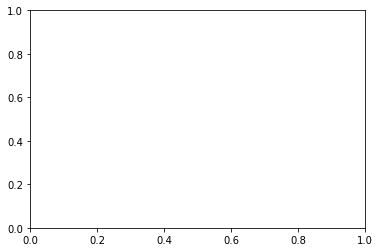

In [15]:
data.AveragePrice.value_counts().plot(kind='bar',autopct='%1.1f%%', startangle=90);
data.AveragePrice.value_counts()

Text(0.5, 1.0, 'Correlation HeatMap')

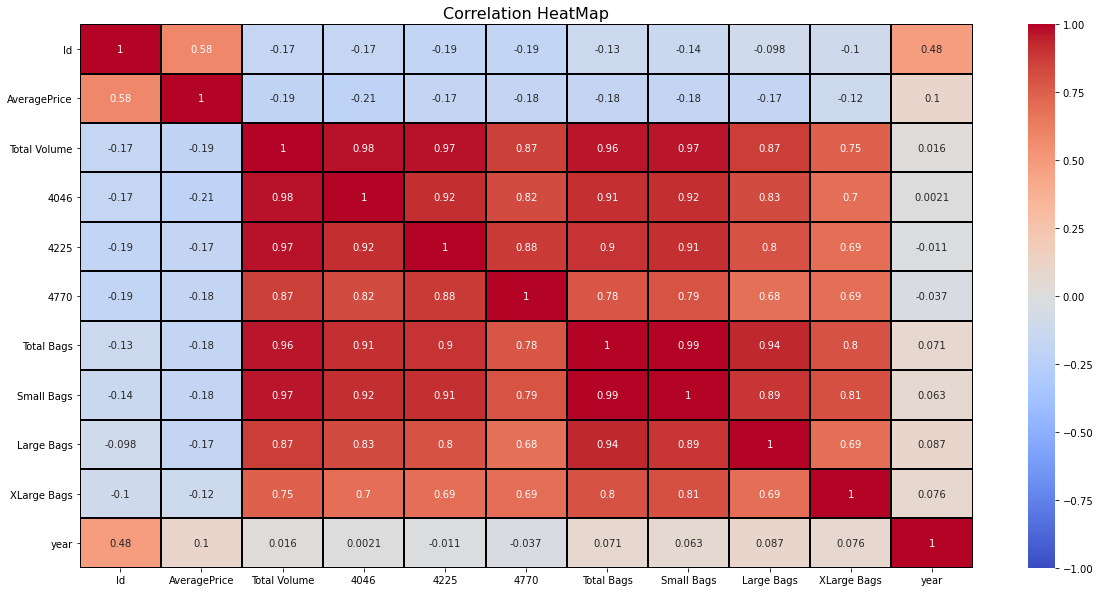

In [16]:
figure = plt.figure(figsize = (20,10))
HeatMap = sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm',vmin = -1, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

In [124]:
import sweetviz as sv
sweet_report_avocado = sv.analyze(data)
sweet_report_avocado.show_html('Avocado_sweet_report_.html')

                                             |                                             | [  0%]   00:00 ->…

Report Avocado_sweet_report_.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### OBSERVATIONS
- Average price is highly correlated with Type and Region

In [19]:
data.columns

Index(['Id', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [20]:
data_intermediate = data[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
       ]]
data_intermediate.head()

Total Volume       4046      4225    4770  Total Bags  Small Bags  \
0       2584.08      61.21    143.82    0.00     2379.05     2379.05   
1     100811.00    3181.00  43510.00   86.00    54034.00    11788.00   
2     430096.94  242212.80  81697.52  264.25   105922.37    48557.37   
3       5433.16     437.48   2422.71  544.63     2028.34     2021.67   
4       5614.09    2123.47   2121.26    0.00     1369.36      392.02   

   Large Bags  XLarge Bags  
0        0.00          0.0  
1    42246.00          0.0  
2    57365.00          0.0  
3        6.67          0.0  
4      977.34          0.0

In [21]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(data_intermediate)

# Inputting our transformed data in a dataframe
scaled_frame = pd.DataFrame(data=scaled_arr, columns=data_intermediate.columns)

# Getting a glimpse of transformed data
scaled_frame.head()
scaled_frame.describe()

Total Volume          4046          4225          4770    Total Bags  \
count  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04  1.459900e+04   
mean   5.671271e-18  5.256810e-17  3.404854e-17  1.725108e-16  2.429350e-17   
std    1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00  1.000034e+00   
min   -2.470536e-01 -2.310018e-01 -2.464978e-01 -2.121316e-01 -2.435205e-01   
25%   -2.438874e-01 -2.302980e-01 -2.438736e-01 -2.121316e-01 -2.381746e-01   
50%   -2.146610e-01 -2.240199e-01 -2.213647e-01 -2.103695e-01 -2.015212e-01   
75%   -1.177105e-01 -1.408571e-01 -1.202904e-01 -1.522952e-01 -1.272408e-01   
max    1.874054e+01  1.768503e+01  1.755129e+01  2.461730e+01  2.030183e+01   

         Small Bags    Large Bags   XLarge Bags  
count  1.459900e+04  1.459900e+04  1.459900e+04  
mean   2.764340e-18 -1.081078e-16 -2.803182e-16  
std    1.000034e+00  1.000034e+00  1.000034e+00  
min   -2.446227e-01 -2.218841e-01 -1.730288e-01  
25%   -2.406601e-01 -2.213231e-01 -1.730288e-01  
50%   -2.077662e-01 -2.106961e-01 -1.730288e-01  
75%   -1.283588e-01 -1.300881e-01 -1.656389e-01  
max    1.850401e+01  2.418365e+01  3.169310e+01

In [22]:
data_categorical = data[['Date','type','region']]

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
data_categorical = data_categorical.apply(LabelEncoder().fit_transform)
data_categorical.head()

Date  type  region
0   137     1       0
1   149     0      23
2   110     0      31
3    72     1       7
4    53     1       1

In [25]:
data_numerical = scaled_frame[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]                                        
data_numerical.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.246386 -0.230951 -0.246373 -0.212132   -0.240997   -0.241290   
1     -0.216547 -0.228366 -0.208669 -0.211293   -0.186217   -0.228111   
2     -0.116518 -0.030287 -0.175467 -0.209555   -0.131189   -0.176605   
3     -0.245520 -0.230639 -0.244391 -0.206821   -0.241369   -0.241791   
4     -0.245465 -0.229242 -0.244653 -0.212132   -0.242068   -0.244074   

   Large Bags  XLarge Bags  
0   -0.221884    -0.173029  
1   -0.041605    -0.173029  
2    0.022914    -0.173029  
3   -0.221856    -0.173029  
4   -0.217713    -0.173029

In [26]:
data_model = pd.concat([data_categorical,data_numerical], axis = 1)
data_model.head()

Date  type  region  Total Volume      4046      4225      4770  Total Bags  \
0   137     1       0     -0.246386 -0.230951 -0.246373 -0.212132   -0.240997   
1   149     0      23     -0.216547 -0.228366 -0.208669 -0.211293   -0.186217   
2   110     0      31     -0.116518 -0.030287 -0.175467 -0.209555   -0.131189   
3    72     1       7     -0.245520 -0.230639 -0.244391 -0.206821   -0.241369   
4    53     1       1     -0.245465 -0.229242 -0.244653 -0.212132   -0.242068   

   Small Bags  Large Bags  XLarge Bags  
0   -0.241290   -0.221884    -0.173029  
1   -0.228111   -0.041605    -0.173029  
2   -0.176605    0.022914    -0.173029  
3   -0.241791   -0.221856    -0.173029  
4   -0.244074   -0.217713    -0.173029

In [27]:
data_model.columns

Index(['Date', 'type', 'region', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'],
      dtype='object')

In [28]:
x = data_model[['Date', 'type', 'region', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
x.head()

Date  type  region  Total Volume      4046      4225      4770  Total Bags  \
0   137     1       0     -0.246386 -0.230951 -0.246373 -0.212132   -0.240997   
1   149     0      23     -0.216547 -0.228366 -0.208669 -0.211293   -0.186217   
2   110     0      31     -0.116518 -0.030287 -0.175467 -0.209555   -0.131189   
3    72     1       7     -0.245520 -0.230639 -0.244391 -0.206821   -0.241369   
4    53     1       1     -0.245465 -0.229242 -0.244653 -0.212132   -0.242068   

   Small Bags  Large Bags  XLarge Bags  
0   -0.241290   -0.221884    -0.173029  
1   -0.228111   -0.041605    -0.173029  
2   -0.176605    0.022914    -0.173029  
3   -0.241791   -0.221856    -0.173029  
4   -0.244074   -0.217713    -0.173029

In [29]:
y = data[['AveragePrice']]
y.head()

AveragePrice
0          1.86
1          1.14
2          0.95
3          1.71
4          1.66

### **5.2 Data Cleaning**

- In this section, we will **remove** columns which are **redundant** for model.

---
# **6. Exploratory Data Analysis**

#### **Question:** What is the distribution of the **target** feature?

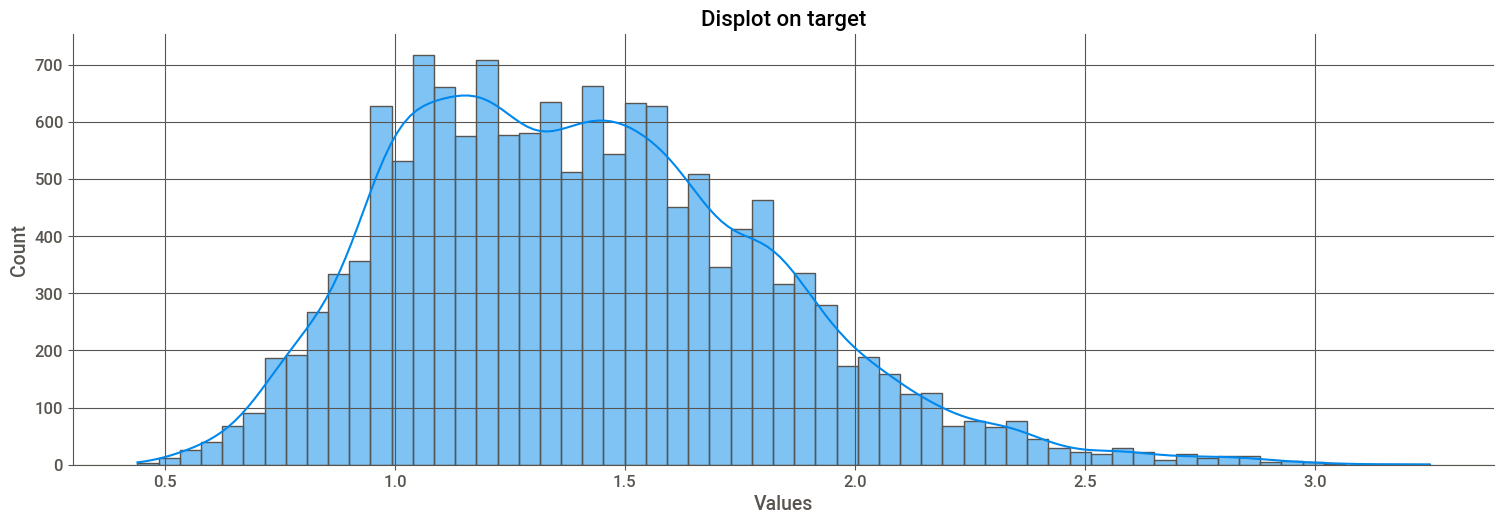

In [30]:
# Plot a displot on target variable
data_sns = data
sns.displot(x='AveragePrice', data=data_sns, kde=True, aspect=3)

# Add some cosmetics
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Values', size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Displot on target', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

# **7. Data Post Processing**

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train Import the train test split and split the data into train and test data for x and y.

-from sklearn.model_selection import train_test_split split and split the data into train and test data for x and y.


In [31]:
from sklearn.model_selection import train_test_split

In [46]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (11679, 11)
y_train shape:  (11679, 1)
x_test shape:  (2920, 11)
y_test shape:  (2920, 1)


# **8. Model Development & Evaluation**

### **8.1 Model Development & Evaluation without PCA**

In [43]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
import plotly.graph_objs as go                                      # Importing plotly for interactive visualizations
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features in the dataset
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
from sklearn.ensemble import RandomForestRegressor                  # To create a random forest regressor model
from sklearn.linear_model import LinearRegression                   # To create a linear regression model
from sklearn import metrics                                         # Importing to evaluate the model used for regression
from sklearn.decomposition import PCA                               # Importing to create an instance of PCA model
#-------------------------------------------------------------------------------------------------------------------------------
from random import randint                                          # Importing to generate random integers
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # For time functionality
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [36]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB                                 # To create a Naive Bayes model using algorithm
from sklearn.model_selection import cross_val_score, cross_val_predict

### Importing the LinearRegression function

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)

In [96]:
randforest_model = RandomForestRegressor(n_estimators = 14, random_state = 42, n_jobs = -1)

In [ ]:
lr_model.fit(x_train, y_train)

In [97]:
randforest_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=14, n_jobs=-1, random_state=42)

In [ ]:
# training a DescisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor(max_depth = 16).fit(x_train, y_train)
dtree_model

In [ ]:
y_pred_train_dt = dtree_model.predict(x_train)

In [ ]:
y_pred_test_dt = dtree_model.predict(x_test)

from sklearn.svm import SVR
svm_model_linear = SVR().fit(x_train, y_train)
svm_model_linear

In [ ]:
y_pred_train_lr = lr_model.predict(x_train)
y_pred_train_lr

In [ ]:
y_pred_test_lr = lr_model.predict(x_test)
y_pred_test_lr

In [98]:
y_pred_train_rf = randforest_model.predict(x_train)
y_pred_train_rf

array([2.66357143, 2.31928571, 1.42142857, ..., 1.645     , 1.39642857,
       1.35928571])

In [99]:
y_pred_test_rf = randforest_model.predict(x_test)
y_pred_test_rf

array([0.56071429, 1.58714286, 1.58642857, ..., 1.49571429, 1.36071429,
       1.38285714])

In [93]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [48]:
y_pred_train_gb = gb_model.predict(x_train)
y_pred_train_gb

array([2.24008878, 2.09836246, 1.66501912, ..., 1.67061901, 1.40996352,
       1.47019414])

In [49]:
y_pred_test_gb =gb_model.predict(x_test)
y_pred_test_gb

array([0.78695181, 1.4859838 , 1.78243949, ..., 1.33037075, 1.40813653,
       1.29659962])

### RMSE SCORE and R2-SCORE of GB Regressor for Train Set

In [50]:
RMSE_train_gb = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_gb))
r2_train_gb = metrics.r2_score(y_train, y_pred_train_gb)
print('RMSE for training set in LR is {}'.format(RMSE_train_gb))
print('R2 for training set in LR is {}'.format(r2_train_gb))

RMSE for training set in LR is 0.1869720017743709
R2 for training set in LR is 0.7870321302438539


### RMSE SCORE and R2-SCORE of GB Regressor for Test Set

In [51]:
RMSE_test_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_gb))
r2_test_gb = metrics.r2_score(y_test, y_pred_test_gb)
print('RMSE for testing set in LR is {}'.format(RMSE_test_gb))
print('R2 for testing set in LR is {}'.format(r2_test_gb))

RMSE for testing set in LR is 0.1937026935224641
R2 for testing set in LR is 0.767431590865941


### RMSE SCORE and R2-SCORE of Linear regression for Train Set

In [ ]:
RMSE_train_lr = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_lr))
r2_train_lr = metrics.r2_score(y_train, y_pred_train_lr)
print('RMSE for training set in LR is {}'.format(RMSE_train_lr))
print('R2 for training set in LR is {}'.format(r2_train_lr))

### RMSE SCORE and R2-SCORE of Linear regression for Test Set

In [ ]:
RMSE_test_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lr))
r2_test_lr = metrics.r2_score(y_test, y_pred_test_lr)
print('RMSE for testing set in LR is {}'.format(RMSE_test_lr))
print('R2 for testing set in LR is {}'.format(r2_test_lr))

### RMSE SCORE and R2-SCORE of Random Forest Regressor Train Set

In [100]:
RMSE_train_rf = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rf))
r2_train_rf = metrics.r2_score(y_train, y_pred_train_rf)
print('RMSE for training set in RF is {}'.format(RMSE_train_rf))
print('R2 for training set in RF is {}'.format(r2_train_rf))

RMSE for training set in RF is 0.05634255772497061
R2 for training set in RF is 0.9806609984605541


### RMSE SCORE and R2-SCORE of Random Forest Regressor Test Set

In [101]:
RMSE_test_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rf))
r2_test_rf = metrics.r2_score(y_test, y_pred_test_rf)
print('RMSE for testing set in RF is {}'.format(RMSE_test_rf))
print('R2 for testing set in RF is {}'.format(r2_test_rf))

RMSE for testing set in RF is 0.13293900430261482
R2 for testing set in RF is 0.8904570970599555


### RMSE SCORE and R2-SCORE of Decision Tree Regressor Train Set

In [ ]:
RMSE_train_dt = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_rf))
r2_train_dt = metrics.r2_score(y_train, y_pred_train_dt)
print('RMSE for training set in RF is {}'.format(RMSE_train_dt))
print('R2 for training set in RF is {}'.format(r2_train_dt))

### RMSE SCORE and R2-SCORE of Decision Tree Regressor Test Set

In [ ]:
RMSE_test_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dt))
r2_test_dt = metrics.r2_score(y_test, y_pred_test_dt)
print('RMSE for testing set in RF is {}'.format(RMSE_test_dt))
print('R2 for testing set in RF is {}'.format(r2_test_dt))

### Dimensionality reduction using PCA

In [102]:
# Perform PCA on X (standardized features)
pca = PCA(n_components=0.80, random_state=0).fit(x_train)

# Calculate the explained variance
var = np.cumsum(np.round(a=pca.explained_variance_ratio_, decimals=3) * 100)

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Scatter(x=list(range(1000)),
                               y= var,
                               name="'Cumulative Explained Variance'",
                               mode='lines+markers'))

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='PCA Analysis', 
                  title_x=0.5,
                  xaxis_title='Number of components', 
                  yaxis_title='Explained Variance %')

# Display the figure
fig.show()

In [103]:
pca = PCA(n_components=11, random_state=0)

X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.transform(x_test)

# Printing shape of X_train and X_test
print('Shape of X_train: ', X_pca_train.shape)
print('Shape of X_test: ', X_pca_test.shape)

Shape of X_train:  (11679, 11)
Shape of X_test:  (2920, 11)


In [104]:
clfs = [LinearRegression(fit_intercept=True), DecisionTreeRegressor(max_depth = 30),RandomForestRegressor(random_state=42,n_jobs =-1)]

for clf in clfs:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculate start time
  start_time = time.time()

  # Train the model
  clf.fit(X_pca_train, y_train)

  # Make predictions on the trained model
  predictions = clf.predict(X_pca_test)

  # Estimating the model performance
  RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
  R_squared = metrics.r2_score(y_test, predictions)

  # Calculate evaluated time
  elapsed_time = (time.time() - start_time)

  # Display the metrics and time took to develop the model
  print('Performance Metrics of', model_name, ':')
  print('[RMSE]:', RMSE, '[R-Squared]:', R_squared, '[Processing Time]:', elapsed_time, 'seconds')
  print('----------------------------------------\n')

Performance Metrics of LinearRegression :
[RMSE]: 0.3031954885029766 [R-Squared]: 0.4301968155455035 [Processing Time]: 0.7178642749786377 seconds
----------------------------------------

Performance Metrics of DecisionTreeRegressor :
[RMSE]: 0.18989396419314203 [R-Squared]: 0.7764875473554812 [Processing Time]: 0.8480038642883301 seconds
----------------------------------------

Performance Metrics of RandomForestRegressor :
[RMSE]: 0.13313310927131 [R-Squared]: 0.8901369751387953 [Processing Time]: 23.65994358062744 seconds
----------------------------------------



## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [106]:
data_submission = data_final['Id']
data_submission

0       11137
1       16503
2        6438
3        8247
4       10481
5        8788
6       14246
7       12050
8        5956
9        1108
10      15956
11      11223
12      15217
13      16363
14      14914
15       6669
16      13255
17       8949
18      14049
19      12782
20      15145
21       8539
22       7848
23      11833
24      15447
25      12190
26       1528
27       5605
28       2661
29       3281
30      13725
31      10454
32      16119
33       7737
34      12888
35      17736
36      13058
37       2443
38      13054
39      14849
40       1708
41      16762
42       3407
43      14765
44        771
45      16905
46      14318
47      14112
48       3972
49       4563
50       6057
51        166
52      11756
53      16189
54       4469
55      10048
56       8292
57       1612
58       9338
59      11536
60       4629
61      14719
62       2393
63      11494
64       9071
65      13624
66       8367
67      15229
68      15494
69      11917
70       6304
71    

In [108]:
data_final_categorical = data_final[['Date','type','region']]
data_final_categorical

Date          type               region
0     2015-05-03       organic      RichmondNorfolk
1     2017-10-08       organic        PhoenixTucson
2     2017-07-02  conventional           GreatLakes
3     2017-05-14  conventional             Syracuse
4     2015-12-13       organic            Nashville
5     2018-01-21  conventional             Midsouth
6     2016-07-10       organic        SouthCarolina
7     2016-10-02       organic  BaltimoreWashington
8     2017-08-06  conventional           California
9     2015-09-13  conventional             LasVegas
10    2017-01-29       organic           LosAngeles
11    2015-09-06       organic           Sacramento
12    2017-01-08       organic              Chicago
13    2017-05-28       organic   NorthernNewEngland
14    2017-10-01       organic                Boise
15    2017-02-19  conventional         Indianapolis
16    2016-07-31       organic             Midsouth
17    2018-03-11  conventional              Roanoke
18    2016-04-24       organic           Sacramento
19    2016-09-04       organic   HarrisburgScranton
20    2017-05-21       organic            Charlotte
21    2018-03-25  conventional     BuffaloRochester
22    2017-11-26  conventional         SanFrancisco
23    2015-12-13       organic                 West
24    2017-09-10       organic              Detroit
25    2016-01-24       organic               Boston
26    2015-08-16  conventional            Northeast
27    2016-03-20  conventional     WestTexNewMexico
28    2015-11-01  conventional              TotalUS
29    2016-11-27  conventional     CincinnatiDayton
30    2016-07-17       organic           Pittsburgh
31    2015-06-21       organic             Midsouth
32    2017-01-01       organic             Midsouth
33    2017-12-31  conventional           Sacramento
34    2016-08-21       organic              Houston
35    2018-03-11       organic        DallasFtWorth
36    2016-05-15       organic             LasVegas
37    2015-01-11  conventional            Southeast
38    2016-06-12       organic             LasVegas
39    2017-12-24       organic  BaltimoreWashington
40    2015-03-01  conventional         Philadelphia
41    2017-11-19       organic      RichmondNorfolk
42    2016-06-26  conventional        DallasFtWorth
43    2017-07-23       organic               Albany
44    2015-03-08  conventional          GrandRapids
45    2017-03-05       organic           Sacramento
46    2016-02-21       organic         SouthCentral
47    2016-02-07       organic             SanDiego
48    2016-08-14  conventional           LosAngeles
49    2016-04-03  conventional        PhoenixTucson
50    2017-09-10  conventional              Chicago
51    2015-10-25  conventional                Boise
52    2015-06-07       organic                Tampa
53    2017-09-10       organic     NewOrleansMobile
54    2016-01-24  conventional              Orlando
55    2015-04-12       organic  HartfordSpringfield
56    2017-07-09  conventional                Tampa
57    2015-01-04  conventional   NorthernNewEngland
58    2015-12-06       organic               Boston
59    2015-08-30       organic            Southeast
60    2016-12-25  conventional               Plains
61    2016-06-05       organic     WestTexNewMexico
62    2015-12-27  conventional            Southeast
63    2015-06-21       organic         SouthCentral
64    2018-02-25  conventional             Syracuse
65    2016-06-26       organic         Philadelphia
66    2017-02-05  conventional              TotalUS
67    2017-10-22       organic     CincinnatiDayton
68    2017-10-22       organic          GrandRapids
69    2015-04-26       organic     WestTexNewMexico
70    2017-01-08  conventional               Denver
71    2015-10-04  conventional              Houston
72    2017-05-28       organic             SanDiego
73    2016-12-25       organic               Denver
74    2016-03-13  conventional               Boston
75    2016-05-08  conventional            Charlotte
76    20

In [109]:
data_final_categorical = data_final_categorical.apply(LabelEncoder().fit_transform)
data_final_categorical.head()

Date  type  region
0    17     1      38
1   144     1      33
2   130     0      15
3   123     0      49
4    49     1      26

In [110]:
data_final_intermediate = data_final[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
       ]]
data_final_intermediate.head()

Total Volume         4046          4225         4770    Total Bags  \
0   12425.42000    426.78000    6174.20000    548.21000    5276.23000   
1   11837.20000   2749.91000     124.43000      0.00000    8962.86000   
2 4250394.01000 740503.01000 1423924.97000 356791.68000 1729174.35000   
3   74951.66000   1032.62000   43170.45000     42.00000   30706.59000   
4    4594.71000    592.64000    2602.48000      0.00000    1399.59000   

     Small Bags   Large Bags  XLarge Bags  
0    2313.33000   2962.90000      0.00000  
1    8921.88000     40.98000      0.00000  
2 1157601.31000 485376.01000  86197.03000  
3   28525.65000   2180.94000      0.00000  
4     696.67000    702.92000      0.00000

In [113]:
scaler_final = StandardScaler()

# Transforming our data
scaled_arr_final = scaler_final.fit_transform(data_final_intermediate)

# Inputting our transformed data in a dataframe
scaled_frame_final = pd.DataFrame(data=scaled_arr_final, columns=data_final_intermediate.columns)

# Getting a glimpse of transformed data
scaled_frame_final.head()
scaled_frame_final.describe()

Total Volume       4046       4225       4770  Total Bags  Small Bags  \
count    3650.00000 3650.00000 3650.00000 3650.00000  3650.00000  3650.00000   
mean        0.00000   -0.00000    0.00000   -0.00000    -0.00000    -0.00000   
std         1.00014    1.00014    1.00014    1.00014     1.00014     1.00014   
min        -0.24763   -0.23751   -0.24440   -0.21728    -0.24488    -0.24628   
25%        -0.24492   -0.23691   -0.24230   -0.21728    -0.24025    -0.24287   
50%        -0.22037   -0.23091   -0.22323   -0.21563    -0.20985    -0.21537   
75%        -0.13287   -0.15579   -0.12608   -0.16398    -0.14042    -0.14784   
max        14.88962   15.19667   14.29510   14.17464    14.02503    14.32333   

       Large Bags  XLarge Bags  
count  3650.00000   3650.00000  
mean      0.00000      0.00000  
std       1.00014      1.00014  
min      -0.22838     -0.18556  
25%      -0.22799     -0.18556  
50%      -0.21823     -0.18556  
75%      -0.14005     -0.17783  
max      13.35703     19.55730

In [116]:
data_final_numerical = scaled_frame_final[['Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]                                        
data_final_numerical.head()

Total Volume     4046     4225     4770  Total Bags  Small Bags  \
0      -0.24457 -0.23722 -0.23999 -0.21289    -0.24026    -0.24360   
1      -0.24472 -0.23564 -0.24431 -0.21728    -0.23703    -0.23593   
2       0.80649  0.26501  0.77405  2.63535     1.26909     1.09578   
3      -0.22907 -0.23681 -0.21353 -0.21694    -0.21799    -0.21321   
4      -0.24652 -0.23711 -0.24254 -0.21728    -0.24365    -0.24547   

   Large Bags  XLarge Bags  
0    -0.21776     -0.18556  
1    -0.22823     -0.18556  
2     1.51160      4.32053  
3    -0.22056     -0.18556  
4    -0.22586     -0.18556

In [117]:
data_final_model = pd.concat([data_final_categorical,data_final_numerical], axis = 1)
data_final_model.head()

Date  type  region  Total Volume     4046     4225     4770  Total Bags  \
0    17     1      38      -0.24457 -0.23722 -0.23999 -0.21289    -0.24026   
1   144     1      33      -0.24472 -0.23564 -0.24431 -0.21728    -0.23703   
2   130     0      15       0.80649  0.26501  0.77405  2.63535     1.26909   
3   123     0      49      -0.22907 -0.23681 -0.21353 -0.21694    -0.21799   
4    49     1      26      -0.24652 -0.23711 -0.24254 -0.21728    -0.24365   

   Small Bags  Large Bags  XLarge Bags  
0    -0.24360    -0.21776     -0.18556  
1    -0.23593    -0.22823     -0.18556  
2     1.09578     1.51160      4.32053  
3    -0.21321    -0.22056     -0.18556  
4    -0.24547    -0.22586     -0.18556

In [ ]:
data_final_model.shape

### Predict the label values using the earlier trained Logistic Regression Model

In [ ]:
y_pred_test_final_logistic = logreg_model.predict(data_final_model)
y_pred_test_final_logistic

### Convert the array into a DataFrame

In [ ]:
y_pred_test_final_logistic = pd.DataFrame(y_pred_test_final_logistic)

In [ ]:
y_pred_test_final_logistic

In [118]:
y_pred_test_final_random_forest = randforest_model.predict(data_final_model)
y_pred_test_final_random_forest

array([1.485     , 1.97      , 1.31357143, ..., 1.11428571, 1.48285714,
       1.60571429])

In [119]:
y_pred_test_final_random_forest = pd.DataFrame(y_pred_test_final_random_forest)
y_pred_test_final_random_forest.head()

0
0 1.48500
1 1.97000
2 1.31357
3 1.43786
4 1.98357

## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(label)

In [120]:
submission_file = pd.concat([data_submission,y_pred_test_final_random_forest], axis = 1)

In [121]:
submission_file.head()

Id       0
0  11137 1.48500
1  16503 1.97000
2   6438 1.31357
3   8247 1.43786
4  10481 1.98357

### To write the final data to the submission file which is .csv without HEADER and INDEX

In [123]:
submission_file.to_csv('D://Avocado_Price_Prediction_Submission.csv', header=False, index=False)

In [ ]:
y_pred_test_final_logistic.to_csv('D://Avacado_Price_Prediction_Intermediate.csv')

### Thank You !!!